In [1]:
from logReg_utils import *

# Import data 

In [3]:
# MINIMUM NUMBER OF LANGUAGES
min_NLang = 2

# COLEXIFICATION MATRICES 
## Stratified-boostrapping (SB)
sb_matrices = loadmat('data/colexMats.mat')
## SB for USF data 
sb_usf = loadmat('data/usf_colexMats.mat')

## Monte-Carlo (MC)
mc_matrices = loadmat('data/MCColex.mat')
## MC for USF data 
mc_usf = loadmat('data/usf_MCColex.mat')

# PREDICTOR MATRICES 
association = load_npz('data/hbc.npz')
usf_association = load_npz('data/usf.npz')
similarity = load_npz('data/w2v.npz')
concrete = load_npz('data/conc.npz')
valence = load_npz('data/valence.npz')
frequency = load_npz('data/frequency.npz')
predictors = [association, similarity, concrete, valence, frequency]

# PAIRS TO BE EXCLUDED
## identical paires in English 
eng_ex = pd.read_csv('data/english.csv')
## superordinate pairs 
super_ex = pd.read_csv('data/superordinate_pairs.csv')

In [35]:
def framework(matrices, usf_matrix, exclude, plot_title):
    log = LogReg(matrices, predictors, exclude, min_NLang)
    mean_r, std_r = log.spearman_r()
    usf_log = LogReg(usf_matrix, [usf_association], exclude, min_NLang)
    mean_usf, std_usf = usf_log.spearman_r(r_multi = False)
    mean_r.insert(1, mean_usf[0])
    std_r.insert(1, std_usf[0])
    
    mean_coeff, std_coeff = sb_log.coefficients()
    
    plot(mean_r, std_r, mean_coeff, std_coeff, plot_title)

# Stratified-bootstrapping 

Calculating coefficients...
Sample #: 99


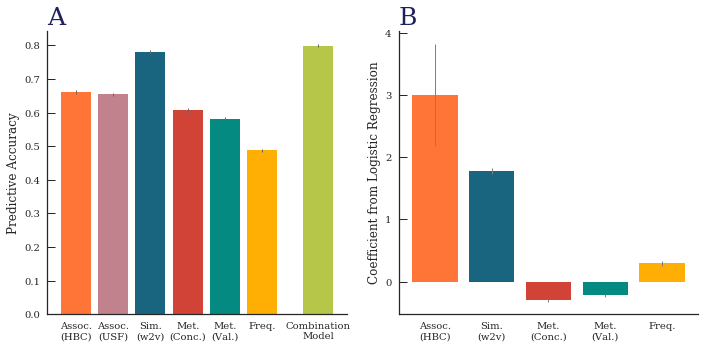

In [36]:
framework(sb_matrices, sb_usf, [eng_ex],'analysis1/sb_analysis1')

# Monte-Carlo 

Calculating coefficients...
Sample #: 99


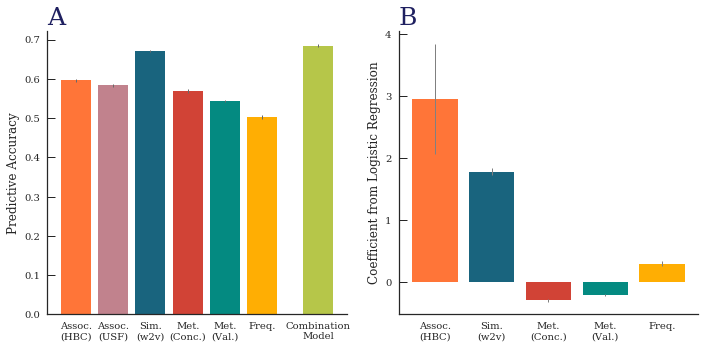

In [37]:
framework(mc_matrices, mc_usf, [eng_ex],'analysis1/mc_analysis1')

# Exclude superordinate pairs

## Stratified_bootstrapping

Calculating coefficients...
Sample #: 99


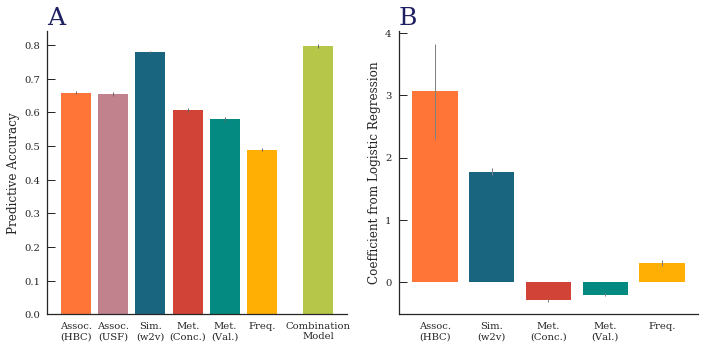

In [38]:
framework(sb_matrices, sb_usf, [eng_ex, super_ex],'analysis1/super_sb_analysis1')

## Monte-Carlo

Calculating coefficients...
Sample #: 99


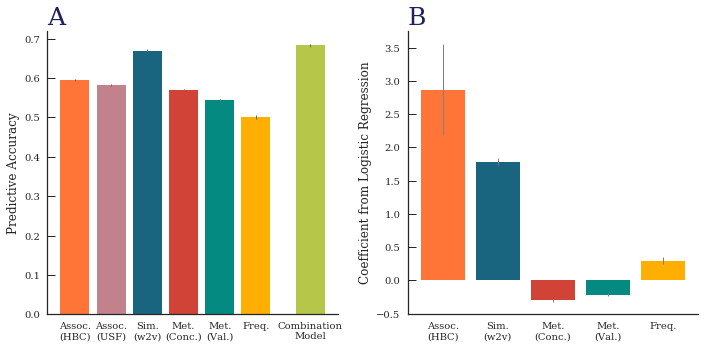

In [39]:
framework(mc_matrices, mc_usf, [eng_ex, super_ex],'analysis1/super_mc_analysis1')